In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({
    'Sepal Length': iris.data[:,0],
    'Sepal Width': iris.data[:,1],
    'Species' : iris.target
})

## Question 1
### Plot (scatter plot) the Iris flower data instances based on the two features of each flower: Sepal Width and Sepal Length. You will have a 2D plot showing where each data instance (=flower) falls on the axes relating to Sepal Width and Sepal Length.

<function matplotlib.pyplot.show(close=None, block=None)>

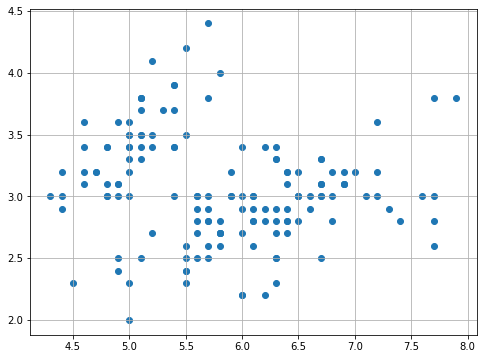

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df['Sepal Length'], df['Sepal Width'])
plt.grid()
plt.show

# We showed the datasets datas in the scatter plot graph.

## Question 2
### Using the labels given for each flower in the dataset, color code the plot you have at Step 1. You should plot each data instance (=flower) with the color set for its label.

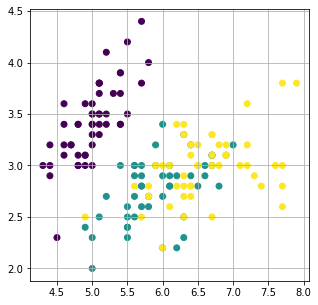

In [5]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Sepal Length'], df['Sepal Width'], c=iris.target)
plt.grid()

# We colorized them with the c=iris.target

## Question 3
### In your k-means method, plot the initial random cluster centers for k=3 on the scatter plot that you have at Step 1.

In [6]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['Species'] == i]['Sepal Length'].mean())
    result_list.append(df.loc[df['Species'] == i]['Sepal Width'].mean())
    
    centroids[i] = result_list
centroids

# We randomly assigned cluster centers.

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

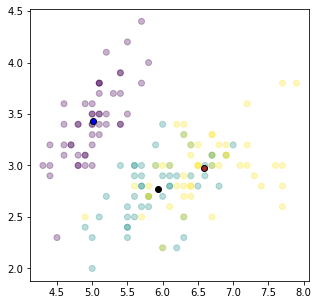

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Sepal Length'], df['Sepal Width'], c=iris.target,alpha = 0.3)
colmap = {0: 'blue', 1: 'black', 2: 'brown'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show() 

# And put them on the scatter plot.

## Question 4

### Plot a similar plot to Step 3, this time with the new cluster centers for each iteration of your k-means algorithm until it converges.

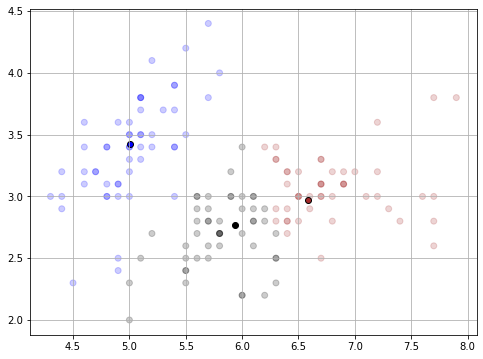

In [8]:
def assignment(df, centroids):
    for i in range(3):
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Sepal Length'] - centroids[i][0]) ** 2
                + (df['Sepal Width'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
df = assignment(df, centroids)


fig = plt.figure(figsize=(8, 6))
plt.scatter(df['Sepal Length'], df['Sepal Width'], color=df['color'], alpha=0.2)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')
plt.grid()
plt.show()

# We recolored the point data in the center cluster colors and in doing so measured the distance using the euclidean algorithm.

In [90]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['Sepal Length'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Sepal Width'])
    return k

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
# We constantly updated the cluster centers until their locations did not change.

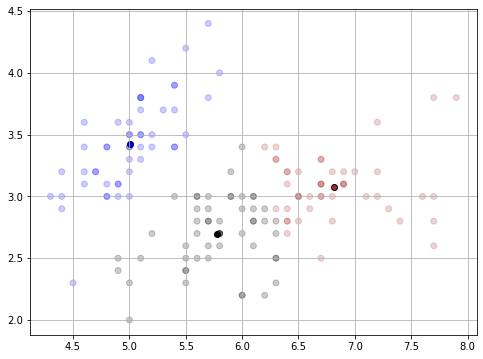

In [95]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df['Sepal Length'], df['Sepal Width'], color=df['color'], alpha = 0.2)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.grid()
plt.show()

# And we can see the new cluster centers here.

## Question 5
### Show the plot you got at Step 2 and the plot you got at the last iteration of your k-means algorithm at Step 4 (after it converges) together side by side in the same plot. Please discuss what you see in these plots, and how the real labels are different from your clusters. Write this discussion in comments.


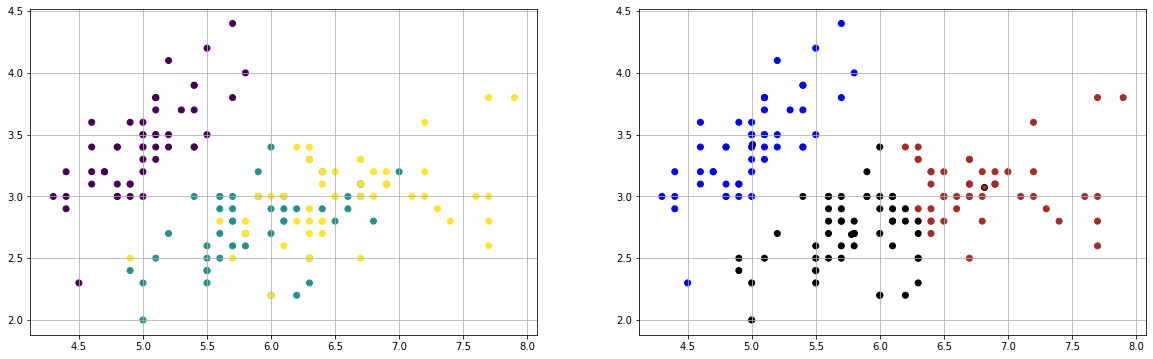

In [96]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(df['Sepal Length'], df['Sepal Width'], c=iris.target)
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df['Sepal Length'], df['Sepal Width'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.grid()

# As we can see in the graphs, while the point data was dispersed, after the clustering we made, the data with similar properties were clustered with each other.
# However, the clustering of dots in the upper left of the graph did not change.